In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Methodology of Scoring Semantic Similarity

* In this section, we outline the methodology for scoring reviews based on their semantic similarity to our predefined list of emotions. As a preliminary trial, we have selected 27 reviews from two different beers featured on a single website.

In [ ]:
!pip install sentence-transformers

> In our case, the model that best shows the difference between joy and sadness is model 3 which is *paraphrase-multilingual-MiniLM-L12-v2*

# Calculating emotion scores of Reviews Dataset
The reviews were embedded in batches using Colab since it takes hours working with transformers.

In [ ]:
# Load your DataFrame
file_path = '/content/drive/MyDrive/ADA - Project/NLP/emotion_scores_ba_48001_50000.csv'
df = pd.read_csv(file_path)

In [ ]:
df['review_id'] = range(1, len(df) + 1)

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util

def score_emotions(df, start_index, end_index):
    # Extract the reviews from the specified range
    reviews = df['text'][start_index:end_index].tolist()

    # Load the model
    model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
    emotions = ['joy', 'sadness', 'anger', 'fear', 'love', 'surprise']

    # Embed the reviews
    review_embeddings = model.encode(reviews, convert_to_tensor=True)

    # Compute and add scores for each emotion
    for emotion in emotions:
        emotion_embedding = model.encode([emotion], convert_to_tensor=True)
        scores = util.cos_sim(review_embeddings, emotion_embedding)
        # Add the scores to the original DataFrame in the corresponding range
        df.loc[start_index:end_index-1, f'{emotion}_score'] = [score[0] for score in scores]

    return df

In [ ]:
# Define the range for processing reviews in batches of 1000
start_index = 100000
end_index = 150001
batch_size = 1000

# Loop through the DataFrame in batches of 1000
for i in range(start_index, end_index, batch_size):
    s = i
    k = min(i + batch_size, end_index)  # Ensure we don't go past the end_index

    # Process the batch
    df_updated = score_emotions(df, s, k)

    # Save the processed batch to a CSV file
    file_name = f'/content/drive/MyDrive/ADA - Project/NLP/emotion_scores_ba_{s}_{k}.csv'
    df_updated.to_csv(file_name, index=False)

    print(f"Batch {s}-{k} processed and saved to {file_name}")

Batch 150000-150001 processed and saved to /content/drive/MyDrive/ADA - Project/NLP/emotion_scores_ba_10000_10001.csv


Same process is applied for rb_dataset and scores are saved.



### Checking if any reviews are missing without score




In [ ]:
df_updated.to_csv('/content/drive/MyDrive/ADA - Project/NLP/emotion_scores_ba.csv', index=False)

In [ ]:
score_columns = ['joy_score', 'sadness_score', 'anger_score', 'fear_score', 'love_score', 'surprise_score']

# Check for NaN values in the score columns
nan_check = df[score_columns].isna().any()

# Display the result
print(nan_check)

joy_score         False
sadness_score     False
anger_score       False
fear_score        False
love_score        False
surprise_score    False
dtype: bool


# Analysis for distribution of the reviews' emotion scores

Emotion scores for the RateBeer and BeerAdvocate datasets were computed through a  process that leveraged NLP to utilise the power of machine learning. We converted the textual reviews into useful numerical data by utilising the SentenceTransformer library, and then we encoded the data into sentiment vectors. We ensured a thorough examination of the various reviews by using a model that was competent at capturing the variations across languages. We measured the sentiment scores for each review by comparing these vectors with the embeddings for key emotions: joy, sadness, anger, fear, love, and surprise.


In [ ]:
# Load 2 reviews dataframe with emotion scores
file_path_ba = '/content/drive/MyDrive/ADA - Project/NLP/emotion_scores_ba.csv'
df_ba = pd.read_csv(file_path_ba)

file_path_rb = '/content/drive/MyDrive/ADA - Project/NLP/emotion_scores_rb.csv'
df_rb = pd.read_csv(file_path_rb)

In [ ]:
# List of emotion score column names
emotion_score_columns = ['joy_score', 'sadness_score', 'anger_score', 'fear_score', 'love_score', 'surprise_score']

# Calculate the standard deviation for each emotion score in df_ba
std_dev_ba = df_ba[emotion_score_columns].std()

# Calculate the standard deviation for each emotion score in df_rb
std_dev_rb = df_rb[emotion_score_columns].std()

# Display the results
print("Standard Deviation in df_ba:")
print(std_dev_ba)
print("\nStandard Deviation in df_rb:")
print(std_dev_rb)

Standard Deviation in df_ba:
joy_score         0.094991
sadness_score     0.097268
anger_score       0.092141
fear_score        0.082006
love_score        0.121734
surprise_score    0.097446
dtype: float64

Standard Deviation in df_rb:
joy_score         0.074621
sadness_score     0.070832
anger_score       0.073188
fear_score        0.061155
love_score        0.075345
surprise_score    0.068854
dtype: float64


In [ ]:
emotion_score_columns = ['joy_score', 'sadness_score', 'anger_score', 'fear_score', 'love_score', 'surprise_score']
df_ba[emotion_score_columns].describe()

,joy_score,sadness_score,anger_score,fear_score,love_score,surprise_score
count,276902.000000,276902.000000,276902.000000,276902.000000,276902.000000,276902.000000
mean,0.198742,0.092701,0.132447,0.092857,0.129526,0.206171
std,0.094991,0.097268,0.092141,0.082006,0.121734,0.097446
min,-0.131700,-0.237952,-0.202736,-0.156734,-0.219666,-0.128802
25%,0.139390,0.031668,0.070544,0.041556,0.061714,0.146340
50%,0.195367,0.079662,0.120548,0.078604,0.105549,0.195844
75%,0.252065,0.130251,0.176556,0.121054,0.152985,0.245985
max,0.786640,0.830390,0.710836,0.610945,0.747191,0.871854


In [ ]:
df_rb[emotion_score_columns].describe()

,joy_score,sadness_score,anger_score,fear_score,love_score,surprise_score
count,1.013187e+06,1.013187e+06,1.013187e+06,1.013187e+06,1.013187e+06,1.013187e+06
mean,2.192368e-01,9.336341e-02,1.330116e-01,8.058203e-02,1.355540e-01,1.887978e-01
std,7.462107e-02,7.083192e-02,7.318815e-02,6.115511e-02,7.534545e-02,6.885371e-02
min,-1.590192e-01,-2.257604e-01,-1.377345e-01,-1.668414e-01,-1.904707e-01,-1.276139e-01
25%,1.724147e-01,4.740001e-02,8.266028e-02,4.025750e-02,8.996349e-02,1.458579e-01
50%,2.203681e-01,8.989641e-02,1.285741e-01,7.461797e-02,1.315422e-01,1.872683e-01
75%,2.679291e-01,1.329282e-01,1.781539e-01,1.125535e-01,1.736001e-01,2.291456e-01
max,7.036326e-01,7.410147e-01,6.281847e-01,6.559164e-01,8.722703e-01,9.358571e-01


* **Given that the standard deviations are relatively low, indicating consistency in the scores, we can confidently proceed with averaging the scores for each beer and subsequently for each beer style.**

In [102]:
# Load data
df_ba =  pd.read_csv('C:/Users/User/Documents/GitHub/data/emotion_scores_ba.csv')
df_rb = pd.read_csv('C:/Users/User/Documents/GitHub/data/emotion_scores_rb.csv')
emotion_score_columns = ['joy_score', 'sadness_score', 'anger_score', 'fear_score', 'love_score', 'surprise_score']

sns.set(style="whitegrid")

# Emotion colors
emotion_colors = {
    'joy_score': '#f2c674',        # Joy
    'sadness_score': '#96d3e0',    # Sadness
    'anger_score': '#e0796e',      # Anger
    'fear_score': '#bcd9ab',       # Fear
    'love_score': '#ebb7c4',       # Love
    'surprise_score': '#be9dcf'    # Surprise
}

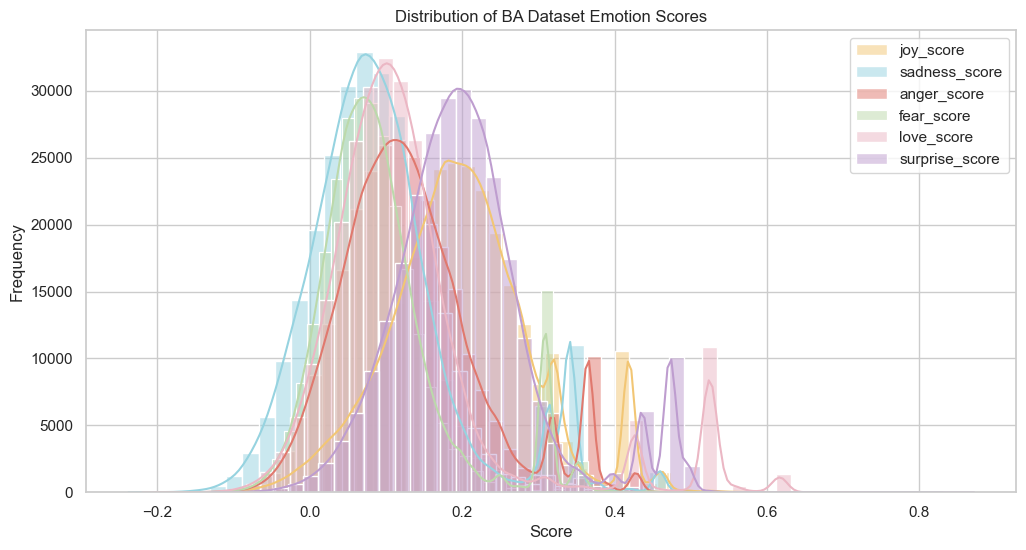

In [116]:
bins_list = [50,50,50,50,50,50]


# Plot histograms
plt.figure(figsize=(12, 6))

for i, emotion in enumerate(emotion_colors):
    sns.histplot(df_ba[emotion], kde=True, bins=bins_list[i], color=emotion_colors[emotion], label=emotion)

    
plt.title('Distribution of BA Dataset Emotion Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


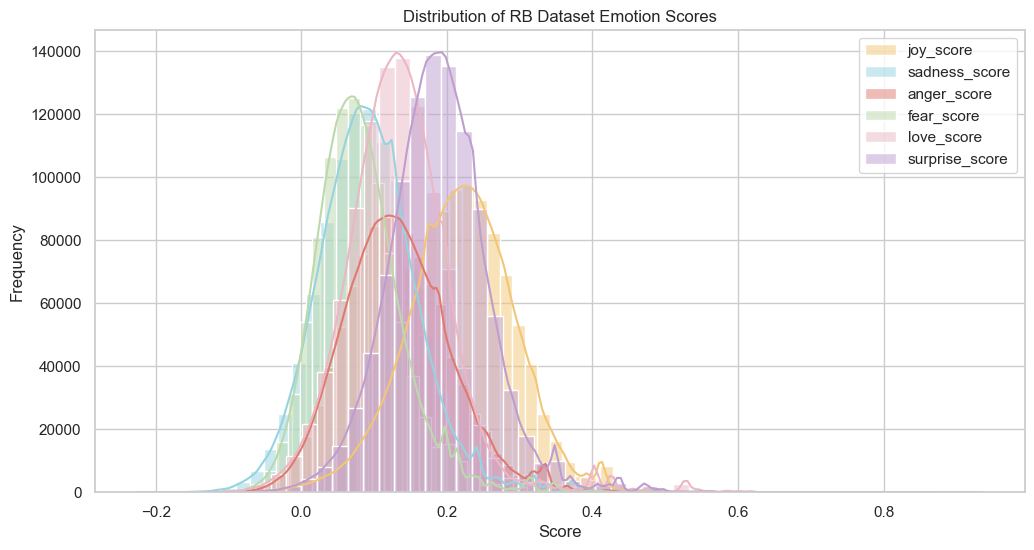

In [115]:
bins_list = [50,50,50,50,50,50]

plt.figure(figsize=(12, 6))

for i, emotion in enumerate(emotion_colors):
    sns.histplot(df_rb[emotion], kde=True, bins=bins_list[i], color=emotion_colors[emotion], label=emotion)

plt.title('Distribution of RB Dataset Emotion Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Calculating average scores for each beer


In [ ]:
df_ba.columns

Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text', 'review', 'joy_score',
       'sadness_score', 'anger_score', 'fear_score', 'love_score',
       'surprise_score', 'review_id'],
      dtype='object')

In [ ]:
df_rb.columns

Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text', 'joy_score', 'sadness_score',
       'anger_score', 'fear_score', 'love_score', 'surprise_score'],
      dtype='object')

In [ ]:
# Group by 'beer_id' and calculate the mean of the emotion scores
emotion_scores_ba_for_beers = df_ba.groupby('beer_id')[emotion_score_columns].mean()

# Add the 'style' column
emotion_scores_ba_for_beers['style'] = df_ba.drop_duplicates('beer_id').set_index('beer_id')['style']

# Display the result
print(emotion_scores_ba_for_beers)

emotion_scores_ba_for_beers.to_csv('/content/drive/MyDrive/ADA - Project/NLP/emotion_scores_ba_for_beers.csv', index=False)

         joy_score  sadness_score  anger_score  fear_score  love_score  \
beer_id                                                                  
12        0.186459       0.117452     0.190158    0.135688    0.139969   
21        0.190012       0.117118     0.176162    0.127905    0.138719   
24        0.189955       0.111605     0.170734    0.104450    0.119913   
26        0.229737       0.114719     0.135085    0.108457    0.146479   
27        0.206573       0.110742     0.155279    0.095813    0.134573   
...            ...            ...          ...         ...         ...   
292318    0.230841       0.027629     0.153431    0.025572    0.184005   
292618    0.259490       0.112259     0.131314    0.110586    0.176124   
292702    0.106913      -0.021323     0.072902    0.016493    0.021000   
292756    0.191794       0.118967     0.136266    0.118631    0.188332   
292959    0.064803       0.075752     0.067344    0.060230    0.075038   

         surprise_score              

In [ ]:
# Group by 'beer_id' and calculate the mean of the emotion scores
emotion_scores_rb_for_beers = df_rb.groupby('beer_id')[emotion_score_columns].mean()

# Add the 'style' column
emotion_scores_rb_for_beers['style'] = df_rb.drop_duplicates('beer_id').set_index('beer_id')['style']

print(emotion_scores_rb_for_beers)

emotion_scores_rb_for_beers.to_csv('/content/drive/MyDrive/ADA - Project/NLP/emotion_scores_rb_for_beers.csv', index=False)

         joy_score  sadness_score  anger_score  fear_score  love_score  \
beer_id                                                                  
3         0.213304       0.080342     0.113798    0.074598    0.123924   
13        0.203673       0.089290     0.138947    0.068812    0.120468   
14        0.233359       0.089430     0.119604    0.063544    0.121999   
15        0.221652       0.114838     0.160027    0.083717    0.136479   
57        0.240076       0.100563     0.132664    0.076903    0.123478   
...            ...            ...          ...         ...         ...   
535690    0.174083       0.117045     0.207317    0.062256    0.104644   
535735    0.290839       0.115623     0.101675    0.019386    0.167425   
535768    0.214710       0.061119     0.014434    0.037043    0.118228   
535794    0.239918       0.074849     0.085205    0.016532    0.128299   
536273    0.177584       0.140520     0.214951    0.145305    0.159409   

         surprise_score              

# Calculating average scores for each beer style

In [ ]:
unique_styles = df_ba['style'].unique()
unique_style_count = df_ba['style'].nunique()
print(f"Number of unique styles: {unique_style_count}")

unique_styles = df_rb['style'].unique()
unique_style_count = df_rb['style'].nunique()
print(f"Number of unique styles: {unique_style_count}")

Number of unique styles: 104
Number of unique styles: 80


In [ ]:
unique_styles_per_beer = df_ba.groupby('beer_id')['style'].nunique()
if (unique_styles_per_beer > 1).any():
    print("Some beer_ids have more than one style associated with them.")
else:
    print("Each beer_id is associated with a unique style.")

Each beer_id is associated with a unique style.


In [ ]:
unique_styles_per_beer = df_rb.groupby('beer_id')['style'].nunique()
if (unique_styles_per_beer > 1).any():
    print("Some beer_ids have more than one style associated with them.")
else:
    print("Each beer_id is associated with a unique style.")

Each beer_id is associated with a unique style.


In [8]:
# Load 2 reviews dataframe with emotion scores
file_path_ba = '/content/drive/MyDrive/ADA - Project/NLP/emotion_scores_ba_for_beers.csv'
emotion_scores_ba_for_beers = pd.read_csv(file_path_ba)

file_path_rb = '/content/drive/MyDrive/ADA - Project/NLP/emotion_scores_rb_for_beers.csv'
emotion_scores_rb_for_beers = pd.read_csv(file_path_rb)

In [10]:
emotion_score_columns = ['joy_score', 'sadness_score', 'anger_score', 'fear_score', 'love_score', 'surprise_score']

In [13]:
# Group by 'beer_id' and calculate the mean of the emotion scores
emotion_scores_ba_for_styles = emotion_scores_ba_for_beers.groupby('style')[emotion_score_columns].mean()

# Reset the index to turn the 'style' index into a column
emotion_scores_ba_for_styles.reset_index(inplace=True)

# Display the result
print(emotion_scores_ba_for_styles)

# Save to CSV, now including the 'style' column
emotion_scores_ba_for_styles.to_csv('/content/drive/MyDrive/ADA - Project/NLP/emotion_scores_ba_for_beer_styles.csv', index=False)

                          style  joy_score  sadness_score  anger_score  \
0                       Altbier   0.196298       0.098739     0.148250   
1        American Adjunct Lager   0.170932       0.060593     0.096242   
2      American Amber / Red Ale   0.193949       0.097813     0.152243   
3    American Amber / Red Lager   0.183529       0.081462     0.135696   
4           American Barleywine   0.178782       0.081599     0.133608   
..                          ...        ...            ...          ...   
99                 Vienna Lager   0.186454       0.090872     0.129746   
100                  Weizenbock   0.190199       0.088667     0.124013   
101                   Wheatwine   0.166853       0.070940     0.124784   
102               Winter Warmer   0.199746       0.104554     0.148695   
103                     Witbier   0.206820       0.080408     0.101913   

     fear_score  love_score  surprise_score  
0      0.092883    0.127143        0.207595  
1      0.074346    

In [12]:
# Group by 'beer_id' and calculate the mean of the emotion scores
emotion_scores_rb_for_styles = emotion_scores_rb_for_beers.groupby('style')[emotion_score_columns].mean()

# Reset the index to turn the 'style' index into a column
emotion_scores_rb_for_styles.reset_index(inplace=True)

# Display the result
print(emotion_scores_rb_for_styles)

# Save to CSV, now including the 'style' column
emotion_scores_rb_for_styles.to_csv('/content/drive/MyDrive/ADA - Project/NLP/emotion_scores_rb_for_beer_styles.csv', index=False)

                      style  joy_score  sadness_score  anger_score  \
0              Abbey Dubbel   0.203365       0.080878     0.126024   
1              Abbey Tripel   0.227110       0.077330     0.102070   
2             Abt/Quadrupel   0.205601       0.077203     0.116924   
3                   Altbier   0.208427       0.101544     0.156289   
4                 Amber Ale   0.212017       0.103296     0.158536   
..                      ...        ...            ...          ...   
75          Traditional Ale   0.216218       0.093366     0.126005   
76              Weizen Bock   0.216117       0.073179     0.113643   
77                Wheat Ale   0.219954       0.076995     0.099026   
78                  Witbier   0.225974       0.076901     0.094422   
79  Zwickel/Keller/Landbier   0.222747       0.093643     0.123809   

    fear_score  love_score  surprise_score  
0     0.075817    0.130389        0.198102  
1     0.069071    0.138369        0.189992  
2     0.074061    0.1217

In [15]:
emotion_scores_ba_for_styles

,style,joy_score,sadness_score,anger_score,fear_score,love_score,surprise_score
0,Altbier,0.196298,0.098739,0.148250,0.092883,0.127143,0.207595
1,American Adjunct Lager,0.170932,0.060593,0.096242,0.074346,0.093940,0.180464
2,American Amber / Red Ale,0.193949,0.097813,0.152243,0.090014,0.127163,0.204509
3,American Amber / Red Lager,0.183529,0.081462,0.135696,0.082171,0.116557,0.194319
4,American Barleywine,0.178782,0.081599,0.133608,0.083311,0.117468,0.202873
...,...,...,...,...,...,...,...
99,Vienna Lager,0.186454,0.090872,0.129746,0.089005,0.125344,0.195564
100,Weizenbock,0.190199,0.088667,0.124013,0.095258,0.129649,0.218904
101,Wheatwine,0.166853,0.070940,0.124784,0.075092,0.110883,0.196214
102,Winter Warmer,0.199746,0.104554,0.148695,0.095947,0.126440,0.216622


from matplotlib import pyplot as plt
emotion_scores_ba_for_styles['joy_score'].plot(kind='hist', bins=20, title='joy_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_ba_for_styles['sadness_score'].plot(kind='hist', bins=20, title='sadness_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_ba_for_styles['anger_score'].plot(kind='hist', bins=20, title='anger_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_ba_for_styles['fear_score'].plot(kind='hist', bins=20, title='fear_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_ba_for_styles.plot(kind='scatter', x='joy_score', y='sadness_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_ba_for_styles.plot(kind='scatter', x='sadness_score', y='anger_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_ba_for_styles.plot(kind='scatter', x='anger_score', y='fear_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_ba_for_styles.plot(kind='scatter', x='fear_score', y='love_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_ba_for_styles['joy_score'].plot(kind='line', figsize=(8, 4), title='joy_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_ba_for_styles['sadness_score'].plot(kind='line', figsize=(8, 4), title='sadness_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_ba_for_styles['anger_score'].plot(kind='line', figsize=(8, 4), title='anger_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_ba_for_styles['fear_score'].plot(kind='line', figsize=(8, 4), title='fear_score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
emotion_scores_rb_for_styles

,style,joy_score,sadness_score,anger_score,fear_score,love_score,surprise_score
0,Abbey Dubbel,0.203365,0.080878,0.126024,0.075817,0.130389,0.198102
1,Abbey Tripel,0.227110,0.077330,0.102070,0.069071,0.138369,0.189992
2,Abt/Quadrupel,0.205601,0.077203,0.116924,0.074061,0.121775,0.193606
3,Altbier,0.208427,0.101544,0.156289,0.084493,0.139425,0.198127
4,Amber Ale,0.212017,0.103296,0.158536,0.081056,0.141567,0.195680
...,...,...,...,...,...,...,...
75,Traditional Ale,0.216218,0.093366,0.126005,0.076633,0.134215,0.196912
76,Weizen Bock,0.216117,0.073179,0.113643,0.072502,0.128102,0.191155
77,Wheat Ale,0.219954,0.076995,0.099026,0.057167,0.123282,0.181510
78,Witbier,0.225974,0.076901,0.094422,0.065138,0.131349,0.192628


from matplotlib import pyplot as plt
emotion_scores_rb_for_styles['joy_score'].plot(kind='hist', bins=20, title='joy_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_rb_for_styles['sadness_score'].plot(kind='hist', bins=20, title='sadness_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_rb_for_styles['anger_score'].plot(kind='hist', bins=20, title='anger_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_rb_for_styles['fear_score'].plot(kind='hist', bins=20, title='fear_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_rb_for_styles.plot(kind='scatter', x='joy_score', y='sadness_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_rb_for_styles.plot(kind='scatter', x='sadness_score', y='anger_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_rb_for_styles.plot(kind='scatter', x='anger_score', y='fear_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_rb_for_styles.plot(kind='scatter', x='fear_score', y='love_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_rb_for_styles['joy_score'].plot(kind='line', figsize=(8, 4), title='joy_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_rb_for_styles['sadness_score'].plot(kind='line', figsize=(8, 4), title='sadness_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_rb_for_styles['anger_score'].plot(kind='line', figsize=(8, 4), title='anger_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_rb_for_styles['fear_score'].plot(kind='line', figsize=(8, 4), title='fear_score')
plt.gca().spines[['top', 'right']].set_visible(False)

# Analysis for the Averaged Emotion Scores

In [ ]:
df_ba = emotion_scores_ba_for_beers
df_rb = emotion_scores_rb_for_beers

In [ ]:
emotion_score_columns = ['joy_score', 'sadness_score', 'anger_score', 'fear_score', 'love_score', 'surprise_score']
df_ba[emotion_score_columns].describe()

,joy_score,sadness_score,anger_score,fear_score,love_score,surprise_score
count,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000
mean,0.197487,0.088633,0.133088,0.087085,0.124969,0.199587
std,0.049585,0.051310,0.051319,0.043207,0.061057,0.051034
min,-0.039509,-0.123002,-0.054681,-0.105246,-0.057977,0.002449
25%,0.168251,0.057765,0.099644,0.059942,0.088345,0.169565
50%,0.196911,0.086346,0.131118,0.084378,0.117484,0.198768
75%,0.224462,0.113459,0.162248,0.108165,0.147591,0.225092
max,0.485843,0.458822,0.428331,0.355499,0.617025,0.495412


In [ ]:
df_rb[emotion_score_columns].describe()

,joy_score,sadness_score,anger_score,fear_score,love_score,surprise_score
count,34824.000000,34824.000000,34824.000000,34824.000000,34824.000000,34824.000000
mean,0.219788,0.092923,0.135213,0.076357,0.135578,0.190047
std,0.036126,0.033584,0.041917,0.030770,0.035318,0.031248
min,0.015874,-0.070648,-0.019674,-0.057363,-0.029910,0.001276
25%,0.197978,0.073378,0.106494,0.057677,0.115462,0.172837
50%,0.219527,0.093348,0.134127,0.076184,0.135028,0.189717
75%,0.241923,0.112013,0.162663,0.094245,0.154133,0.207128
max,0.441784,0.358644,0.350297,0.283932,0.500005,0.446975


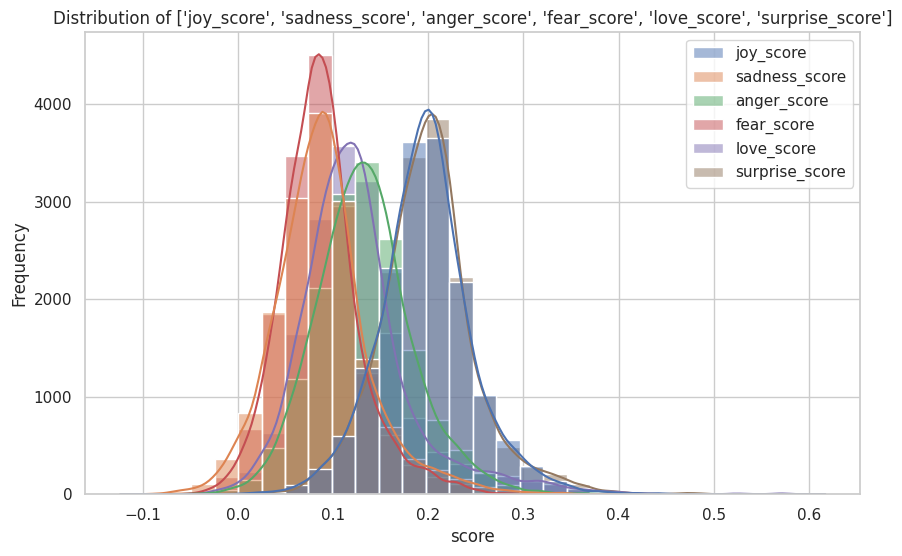

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot histograms for each score column

plt.figure(figsize=(10, 6))
sns.histplot(df_ba[emotion_score_columns], kde=True, bins=30)
plt.title(f'Distribution of {emotion_score_columns}')
plt.xlabel('score')
plt.ylabel('Frequency')
plt.show()

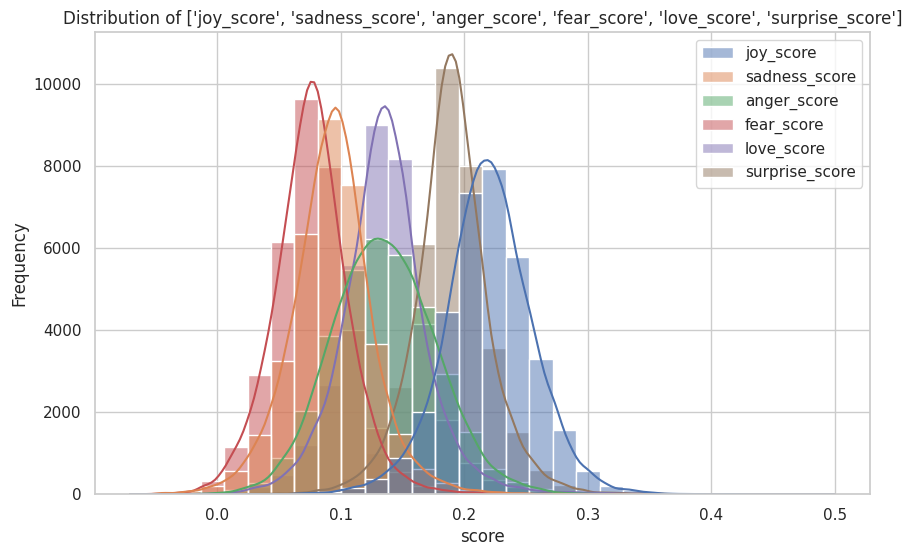

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot histograms for each score column

plt.figure(figsize=(10, 6))
sns.histplot(df_rb[emotion_score_columns], kde=True, bins=30)
plt.title(f'Distribution of {emotion_score_columns}')
plt.xlabel('score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#for styles

In [117]:
# Load data
df_ba =  pd.read_csv('C:/Users/User/Documents/GitHub/data/emotion_scores_ba_for_beer_styles.csv')
df_rb = pd.read_csv('C:/Users/User/Documents/GitHub/data/emotion_scores_rb_for_beer_styles.csv')

In [ ]:
df_ba = emotion_scores_ba_for_styles
df_rb = emotion_scores_rb_for_styles

In [ ]:
emotion_score_columns = ['joy_score', 'sadness_score', 'anger_score', 'fear_score', 'love_score', 'surprise_score']
df_ba[emotion_score_columns].describe()

,joy_score,sadness_score,anger_score,fear_score,love_score,surprise_score
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,0.191256,0.086937,0.129628,0.087787,0.122480,0.201175
std,0.011561,0.015510,0.023930,0.014419,0.011762,0.015884
min,0.164363,0.010803,0.032230,0.002181,0.080038,0.083598
25%,0.182048,0.078611,0.113253,0.079988,0.116247,0.195220
50%,0.191403,0.088781,0.133426,0.089903,0.123741,0.202419
75%,0.198653,0.097737,0.148323,0.096111,0.129402,0.208372
max,0.214981,0.114698,0.181088,0.112229,0.149393,0.228116


In [ ]:
df_rb[emotion_score_columns].describe()

,joy_score,sadness_score,anger_score,fear_score,love_score,surprise_score
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.215371,0.091833,0.133136,0.077332,0.134530,0.192070
std,0.012042,0.011024,0.026033,0.011154,0.008509,0.008389
min,0.189690,0.062564,0.073715,0.056440,0.114947,0.176800
25%,0.205776,0.083595,0.115505,0.070361,0.130287,0.185540
50%,0.215739,0.094493,0.129814,0.076019,0.134393,0.192022
75%,0.224100,0.099099,0.155252,0.085396,0.139029,0.196730
max,0.239506,0.124284,0.193338,0.104382,0.168004,0.216665


In [118]:
emotion_score_columns = ['joy_score', 'sadness_score', 'anger_score', 'fear_score', 'love_score', 'surprise_score']

# Color codes for each emotion
emotion_colors = {
    'joy_score': '#f2c674',        # Joy
    'sadness_score': '#96d3e0',    # Sadness
    'anger_score': '#e0796e',      # Anger
    'fear_score': '#bcd9ab',       # Fear
    'love_score': '#ebb7c4',       # Love
    'surprise_score': '#be9dcf'    # Surprise
}

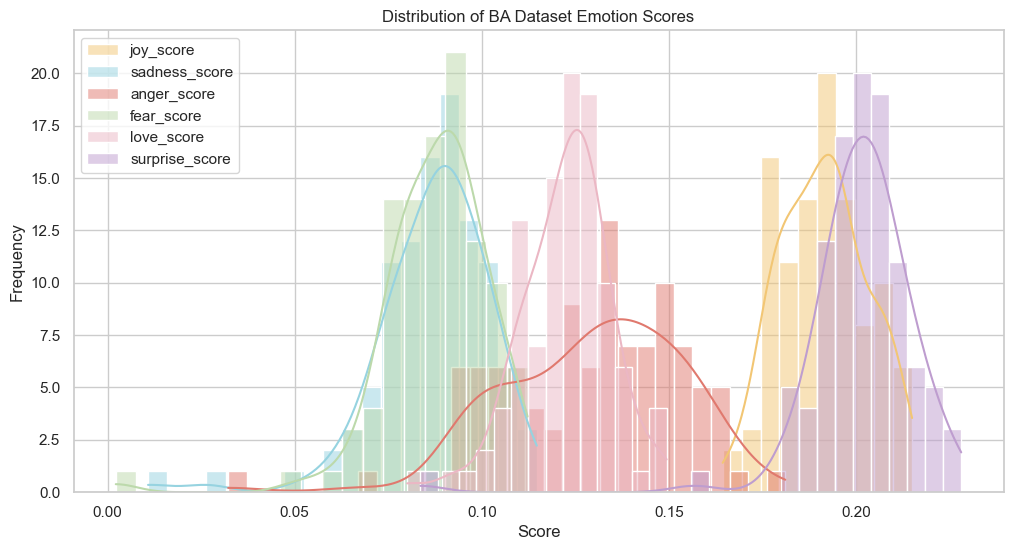

In [124]:
bins_list = [10,20,30,20,15,30]

plt.figure(figsize=(12, 6))

for i, emotion in enumerate(emotion_colors):
    sns.histplot(df_ba[emotion], kde=True, bins=bins_list[i], color=emotion_colors[emotion], label=emotion)

plt.title('Distribution of BA Dataset Emotion Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

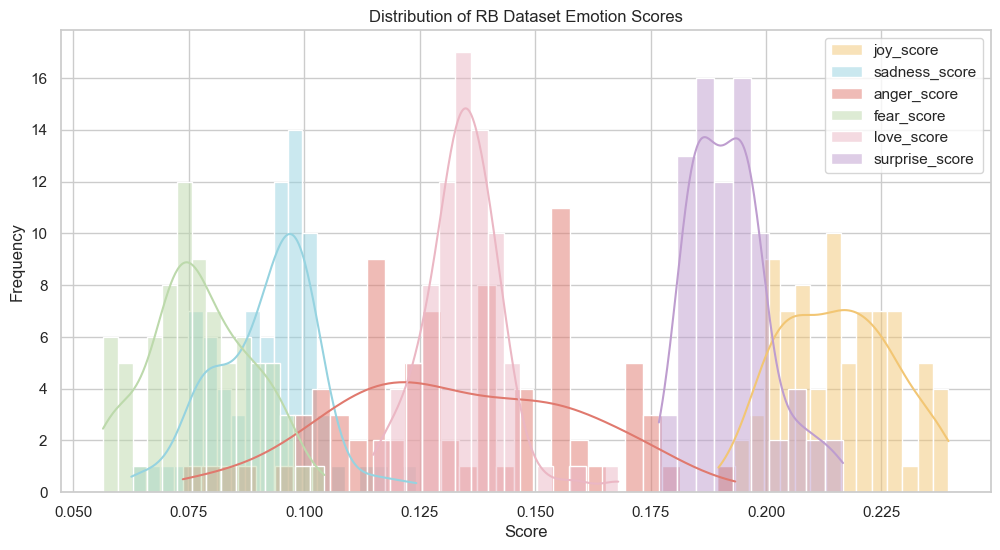

In [129]:
bins_list = [15,20,30,15,15,10]

plt.figure(figsize=(12, 6))

for i, emotion in enumerate(emotion_colors):
    sns.histplot(df_rb[emotion], kde=True, bins=bins_list[i], color=emotion_colors[emotion], label=emotion)

plt.title('Distribution of RB Dataset Emotion Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Additional Analysis

In [1]:
import copy
import re
import numpy as np
import pandas as pd
import fsspec
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
import geopandas as gpd
import matplotlib.pyplot as plt
from PIL import Image
from fuzzywuzzy import fuzz
from matplotlib.colors import LogNorm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", message="Creating legend with loc=\"best\" can be slow with large amounts of data.")

C:\Users\User\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [11]:
# Load data
df_ba1 =  pd.read_csv('C:/Users/User/Documents/GitHub/data/emotion_scores_ba.csv')
df_rb1 = pd.read_csv('C:/Users/User/Documents/GitHub/data/emotion_scores_rb.csv')


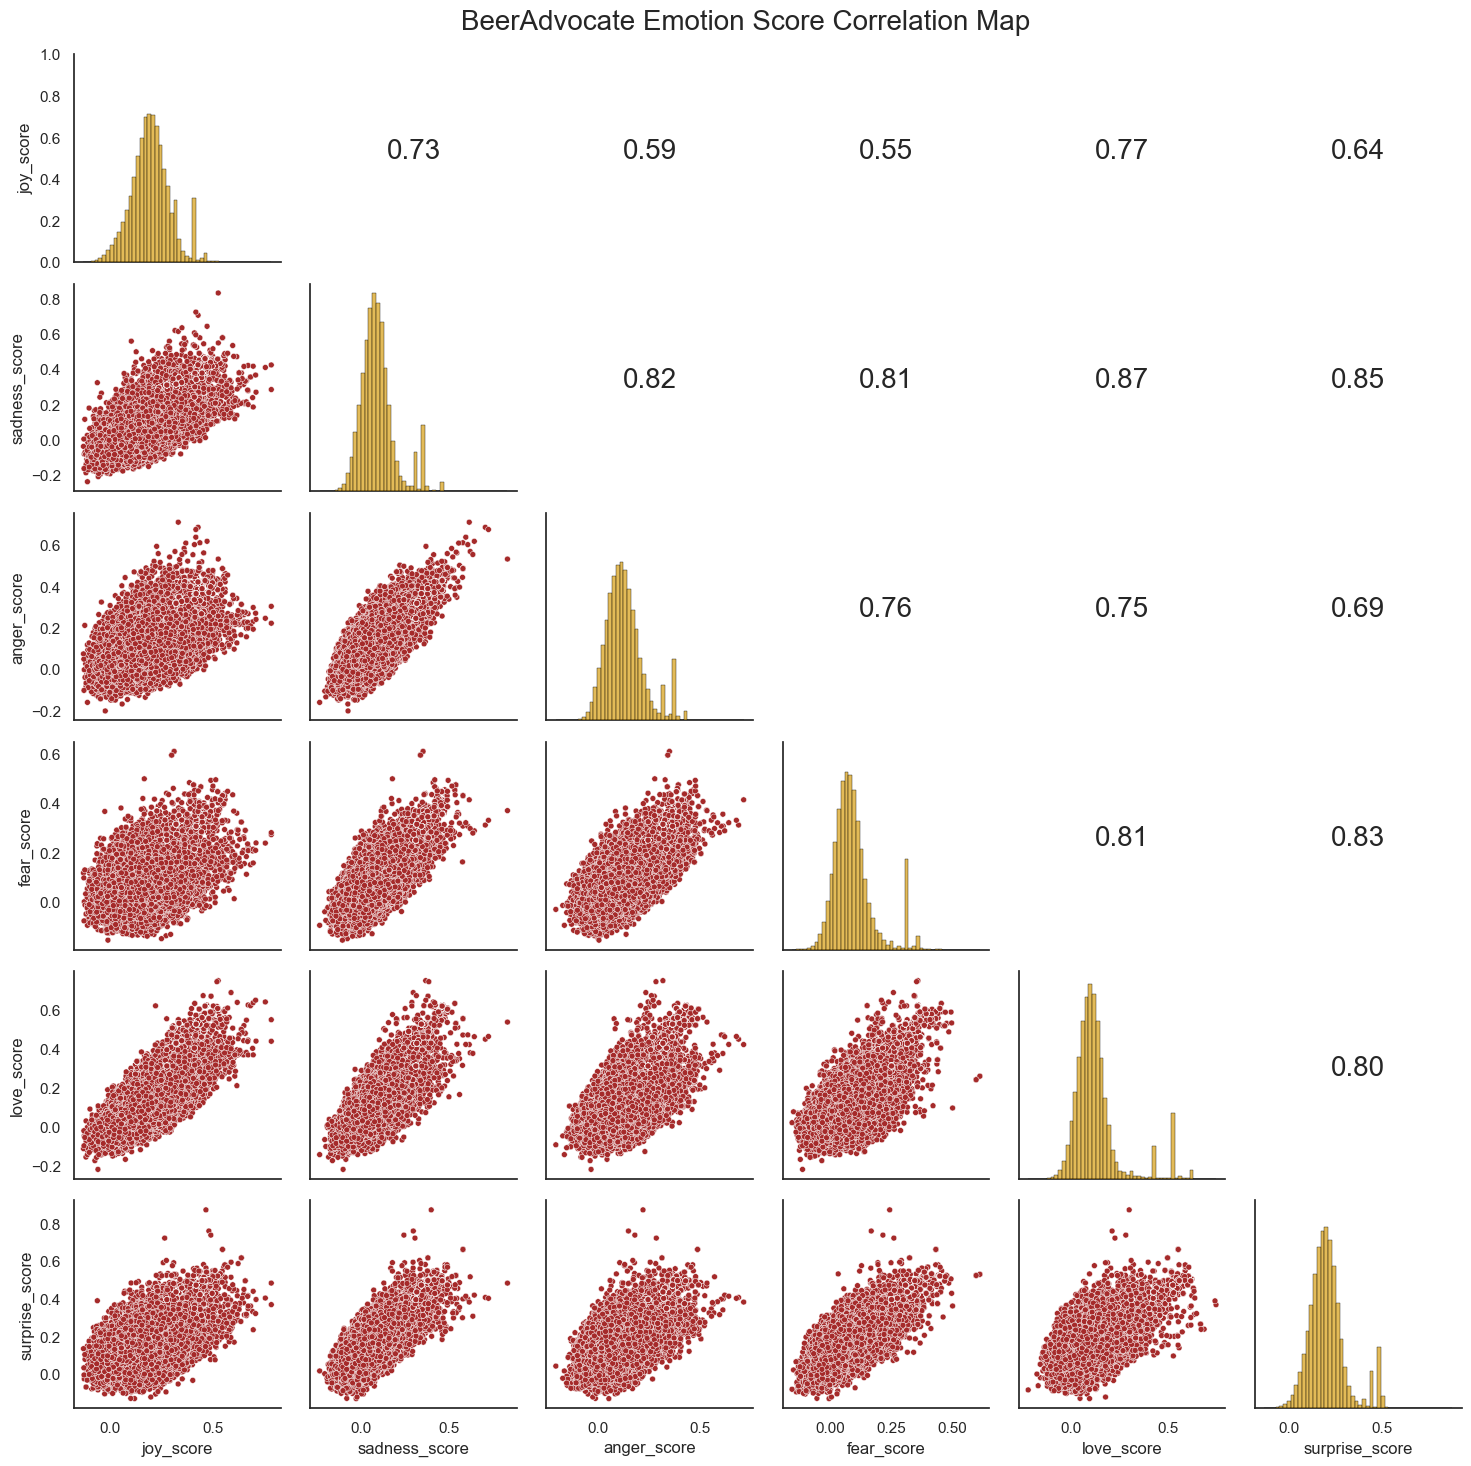

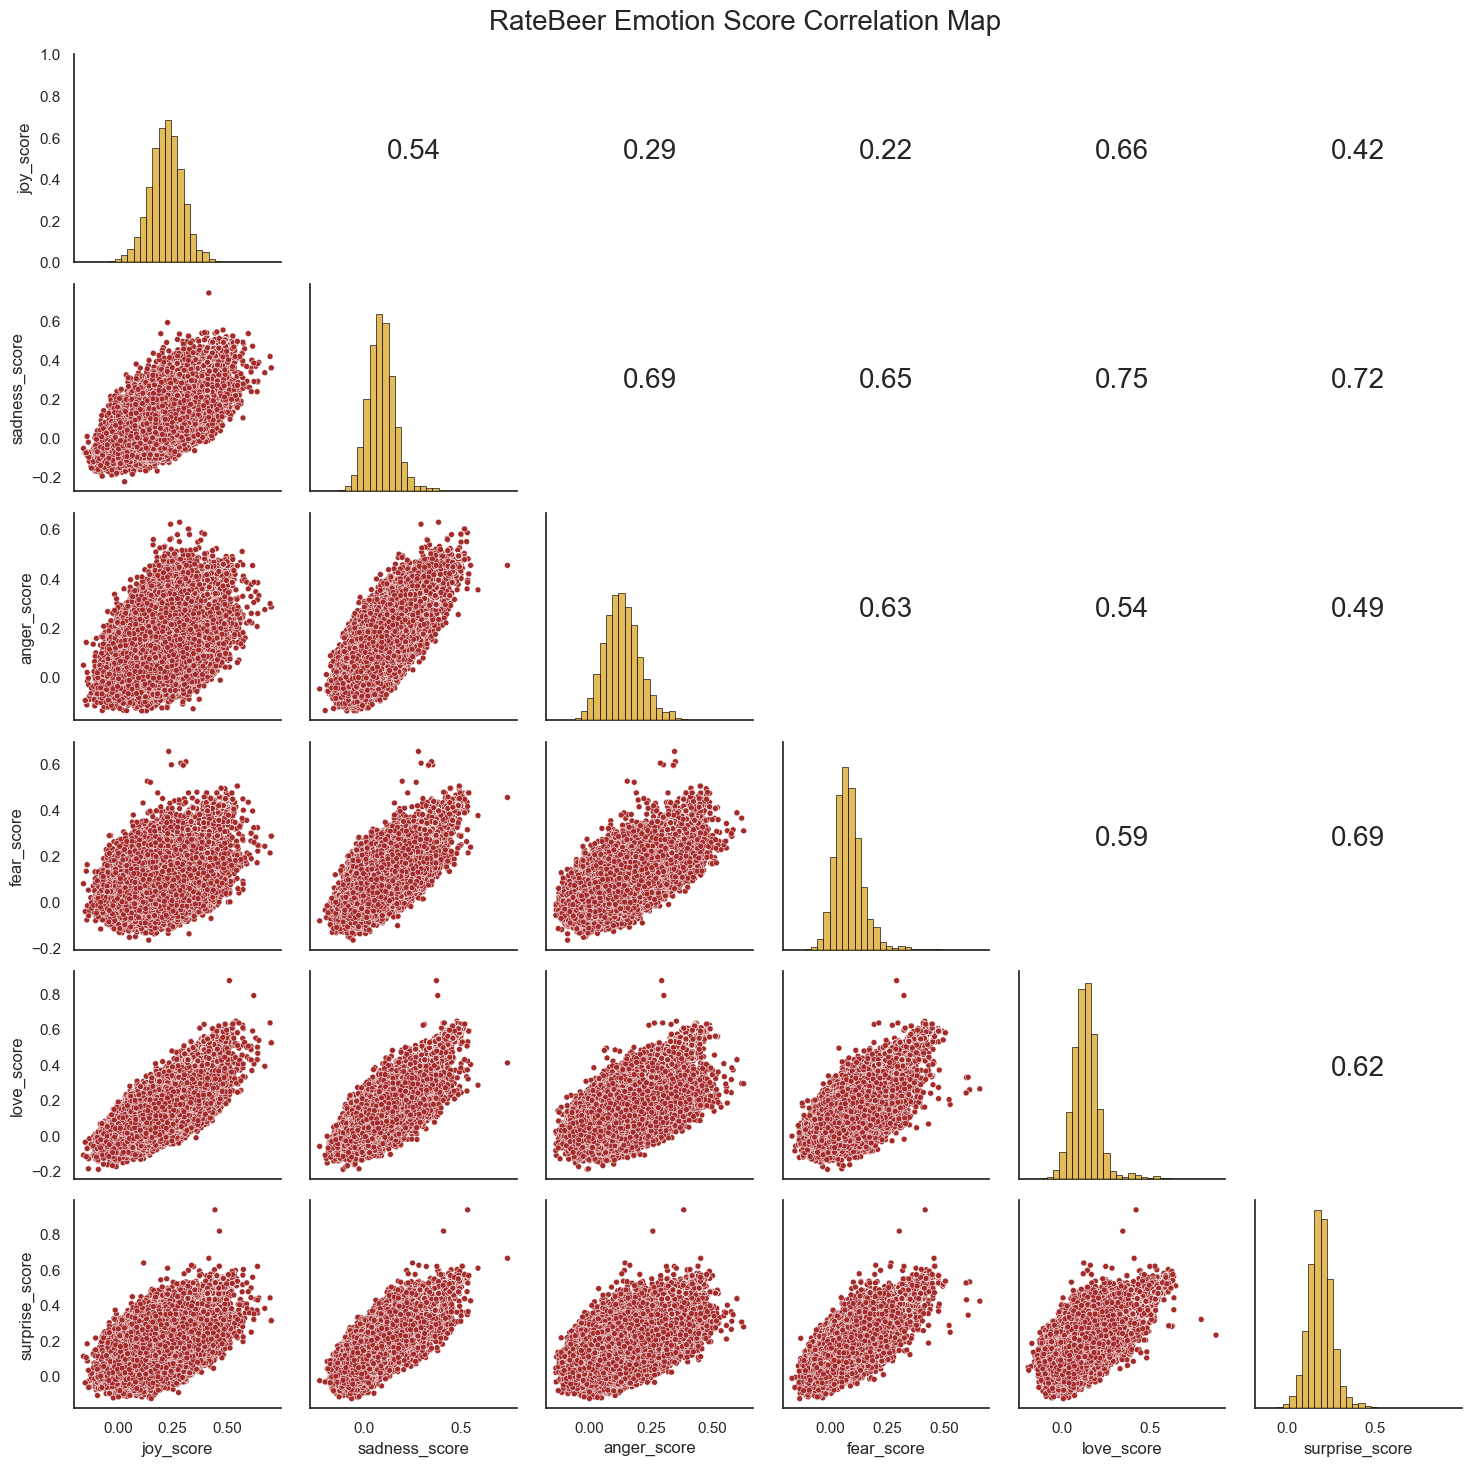

In [31]:
def reg_coef(x, y, **kwargs):
    ax = plt.gca()
    r, _ = pearsonr(x, y)
    norm = plt.Normalize(-1, 1)
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    facecolor = cmap(norm(r))
    ax.annotate(f'{r:.2f}', xy=(0.5, 0.5), xycoords='axes fraction', ha='center', 
                fontsize=20)  # Removed the bbox argument
    ax.set_axis_off()
    
df_ba = pd.DataFrame(df_ba1, columns=['joy_score', 'sadness_score', 'anger_score', 'fear_score', 'love_score', 'surprise_score'])
df_rb = pd.DataFrame(df_rb1, columns=['joy_score', 'sadness_score', 'anger_score', 'fear_score', 'love_score', 'surprise_score'])

# Set the background style
sns.set(style="white")


# Customizing the PairGrid for the RateBeer dataset
grid_ba = sns.PairGrid(df_ba)

# Map the histograms to the diagonal
grid_ba = grid_ba.map_diag(sns.histplot, bins =50, color='goldenrod', edgecolor='black')

# Map the lower triangle with scatter plots in brown
grid_ba = grid_ba.map_lower(sns.scatterplot, size = 0.001, color='brown', edgecolor="w", s=40)

# Map the upper triangle with the correlation coefficients
grid_ba = grid_ba.map_upper(reg_coef)

# Adjust the layout and display the plot
plt.subplots_adjust(top=0.95)
grid_ba.fig.suptitle('BeerAdvocate Emotion Score Correlation Map', fontsize=20)
plt.show()

###### Apply same for RB dataset

# Customizing the PairGrid for the RateBeer dataset
grid_rb = sns.PairGrid(df_rb)

# Map the histograms to the diagonal
grid_rb = grid_rb.map_diag(sns.histplot, bins=30 , color='goldenrod', edgecolor='black')

# Map the lower triangle with scatter plots in brown
grid_rb = grid_rb.map_lower(sns.scatterplot, size = 0.001, color='brown', edgecolor="w", s=40)

# Map the upper triangle with the correlation coefficients
grid_rb = grid_rb.map_upper(reg_coef)

# Adjust the layout and display the plot
plt.subplots_adjust(top=0.95)
grid_rb.fig.suptitle('RateBeer Emotion Score Correlation Map', fontsize=20)
plt.show()
